In [2]:
from gensim import corpora

C:\Users\blk30\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### インポート用クラス

In [1]:
import re

class Aozora:
    decoration = re.compile(r"(［[^［］]*］)|(《[^《》]*》)|[｜\n]")
    def __init__(self, filename):
        self.filename = filename
        with open(filename, "r", encoding="shift-jis") as afile:
            self.whole_str = afile.read()
        paragraphs = self.whole_str.splitlines()
        c = 0
        position = 0
        for (i, u) in enumerate(reversed(paragraphs)):
            if len(u) != 0:
                c = 0
            else:
                c += 1
                if c >= 3:
                    position = i
                    break
        if position != 0:
            paragraphs = paragraphs[:-(position+1)]
            
        newparagraphs = []
        addswitch = True
        for u in paragraphs:
            if u[:2] != '--':
                if addswitch:
                    newparagraphs.append(u)
            else:
                addswitch = not addswitch
                
        
        self.cleanedparagraphs = []
        for u in newparagraphs:
            v = re.sub(self.decoration, '', u)
            self.cleanedparagraphs.append(v)
            
    def read(self):
        return self.cleanedparagraphs


In [12]:

from collections import Counter

aozora = Aozora("imogayu.txt")

string = '\n'.join(aozora.read())

cnt = Counter(string)

print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:50])

[('、', 1148), ('の', 715), ('に', 434), ('。', 401), ('て', 365), ('な', 363), ('た', 356), ('を', 336), ('る', 329), ('は', 326), ('つ', 300), ('が', 293), ('い', 291), ('し', 273), ('と', 265), ('か', 248), ('ら', 231), ('で', 228), ('れ', 226), ('う', 206), ('も', 171), ('そ', 138), ('く', 132), ('あ', 129), ('―', 116), ('や', 116), ('\n', 114), ('ゐ', 113), ('り', 112), ('さ', 108), ('ま', 99), ('へ', 96), ('五', 95), ('す', 93), ('位', 90), ('一', 84), ('\u3000', 82), ('こ', 82), ('ふ', 72), ('云', 69), ('「', 69), ('」', 69), ('け', 68), ('事', 65), ('時', 61), ('人', 61), ('仁', 59), ('見', 58), ('利', 54), ('中', 53)]


In [19]:

import nltk
from nltk.corpus import inaugural

text = inaugural.raw("1789-Washington.txt")
sents = nltk.tokenize.sent_tokenize(text)

for u in sents:
    print('>'+u+'<')

>Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month.<
>On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time.<
>On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could n

In [21]:

import matplotlib.pyplot as plt
import numpy as np

text = inaugural.raw("1789-Washington.txt")

sents = nltk.tokenize.sent_tokenize(text)

cnt = Counter(len(x) for x in sents)

print(sorted(cnt.items(), key=lambda x: [x[1], x[0]], reverse=True))


[(843, 1), (695, 1), (692, 1), (654, 1), (572, 1), (570, 1), (515, 1), (487, 1), (477, 1), (436, 1), (369, 1), (315, 1), (279, 1), (278, 1), (230, 1), (209, 1), (183, 1), (179, 1), (169, 1), (138, 1), (119, 1), (118, 1), (63, 1)]


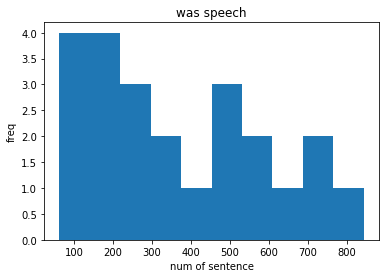

In [23]:

nstring = np.array([len(x) for x in sents])

plt.hist(nstring)
plt.title('was speech')
plt.xlabel('num of sentence')
plt.ylabel('freq')
plt.show()

In [7]:

import re
from collections import Counter


aozora = Aozora(r"imogayu.txt")

string = '\n'.join(aozora.read())

string = re.split('。(?!」)|\n', re.sub('　', '', string))
while '' in string:  string.remove('')   # 空行を除く
    
cnt = Counter([len(x) for x in string])

print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:100])

[(19, 13), (17, 13), (34, 13), (30, 12), (36, 12), (26, 11), (51, 10), (18, 10), (14, 10), (25, 10), (22, 10), (20, 10), (15, 10), (28, 9), (54, 9), (38, 8), (32, 8), (41, 8), (27, 8), (13, 8), (31, 7), (8, 7), (16, 6), (21, 6), (39, 6), (50, 6), (23, 6), (42, 6), (11, 6), (2, 5), (7, 5), (40, 5), (47, 5), (43, 5), (33, 4), (72, 4), (12, 4), (78, 4), (45, 4), (35, 4), (24, 4), (44, 4), (53, 4), (52, 4), (59, 4), (48, 3), (37, 3), (61, 3), (9, 3), (71, 3), (46, 3), (57, 3), (56, 3), (70, 3), (10, 3), (5, 2), (6, 2), (87, 2), (63, 2), (4, 2), (110, 2), (68, 2), (66, 2), (74, 2), (89, 2), (55, 2), (62, 2), (58, 1), (85, 1), (80, 1), (101, 1), (49, 1), (94, 1), (83, 1), (90, 1), (92, 1), (97, 1), (29, 1), (76, 1), (93, 1), (91, 1), (60, 1), (75, 1), (84, 1), (64, 1), (67, 1), (132, 1)]


max 132


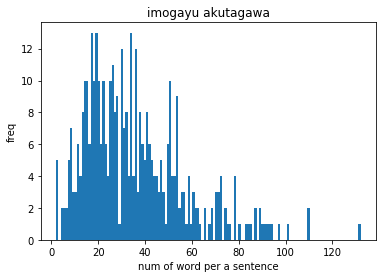

In [11]:

import numpy as np
import matplotlib.pyplot as plt

nstring = np.array([len(x) for x in string if len(x) < 150])
print('max', nstring.max())
plt.hist(nstring, bins=nstring.max())
plt.title('imogayu akutagawa')
plt.xlabel('num of word per a sentence')
plt.ylabel('freq')
plt.show()

In [12]:

aozora = Aozora(r"hashire_merosu.txt")

string = '\n'.join(aozora.read())

string = re.split('。(?!」)|\n', re.sub('　', '', string))
while '' in string:  string.remove('')   # 空行を除く
    
cnt = Counter([len(x) for x in string])

print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:100])

[(11, 27), (13, 26), (15, 22), (10, 22), (12, 21), (16, 21), (9, 20), (18, 19), (19, 17), (14, 16), (8, 14), (17, 14), (22, 12), (23, 12), (25, 11), (6, 11), (27, 10), (21, 10), (5, 9), (30, 9), (24, 9), (7, 9), (3, 6), (35, 6), (20, 6), (32, 6), (38, 6), (28, 6), (4, 6), (26, 5), (43, 4), (29, 4), (57, 4), (31, 4), (41, 4), (69, 3), (33, 3), (52, 3), (58, 2), (34, 2), (45, 2), (37, 2), (49, 2), (53, 2), (50, 2), (47, 2), (42, 1), (72, 1), (79, 1), (44, 1), (36, 1), (70, 1), (54, 1), (39, 1), (85, 1), (55, 1), (104, 1), (60, 1), (71, 1), (51, 1), (84, 1), (65, 1), (48, 1), (61, 1), (40, 1), (1, 1)]


max 104


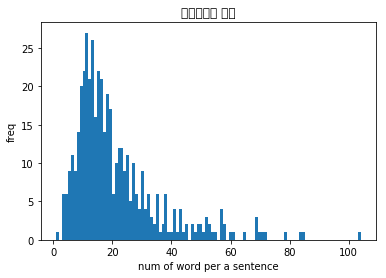

In [13]:
import numpy as np
import matplotlib.pyplot as plt

nstring = np.array([len(x) for x in string if len(x) < 150])
print('max', nstring.max())
plt.hist(nstring, bins=nstring.max())
plt.title('走れメロス 太宰')
plt.xlabel('num of word per a sentence')
plt.ylabel('freq')
plt.show()

[(140, 1), (112, 1), (110, 1), (104, 1), (93, 1), (91, 1), (89, 1), (88, 1), (81, 1), (69, 1), (63, 1), (51, 1), (47, 1), (46, 1), (41, 1), (38, 1), (34, 1), (30, 1), (29, 1), (25, 1), (20, 1), (19, 1), (11, 1)]


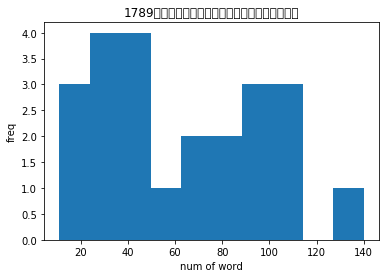

In [20]:
# -*- coding: utf-8 -*-
import nltk
from nltk.corpus import inaugural

sents = nltk.tokenize.sent_tokenize(inaugural.raw('1789-Washington.txt'))
 
cnt = Counter(len(sent.split()) for sent in sents)
print(sorted(cnt.items(), key=lambda x: [x[1], x[0]], reverse=True))
 
nstring = np.array( [len(sent.split()) for sent in sents] )
plt.hist(nstring)
plt.title('1789年ワシントン就任演説の文ごとの単語数分布')
plt.xlabel('num of word')
plt.ylabel('freq')
plt.show()


[(140, 1), (112, 1), (110, 1), (104, 1), (93, 1), (91, 1), (89, 1), (88, 1), (81, 1), (69, 1), (63, 1), (51, 1), (47, 1), (46, 1), (41, 1), (38, 1), (34, 1), (30, 1), (29, 1), (25, 1), (20, 1), (19, 1), (11, 1)]
[(7, 5), (25, 4), (21, 3), (19, 3), (14, 3), (11, 3), (67, 2), (44, 2), (40, 2), (36, 2), (20, 2), (18, 2), (13, 2), (82, 1), (55, 1), (54, 1), (48, 1), (47, 1), (45, 1), (38, 1), (33, 1), (30, 1), (28, 1), (27, 1), (26, 1), (23, 1), (22, 1), (16, 1), (6, 1), (4, 1)]
[(4, 7), (19, 6), (30, 5), (28, 4), (23, 4), (21, 4), (18, 4), (11, 4), (10, 4), (9, 4), (8, 4), (40, 3), (26, 3), (24, 3), (17, 3), (16, 3), (13, 3), (12, 3), (7, 3), (5, 3), (57, 2), (51, 2), (36, 2), (33, 2), (31, 2), (25, 2), (20, 2), (14, 2), (1, 2), (85, 1), (69, 1), (66, 1), (62, 1), (56, 1), (54, 1), (46, 1), (37, 1), (35, 1), (32, 1), (27, 1), (15, 1), (6, 1), (3, 1), (2, 1)]


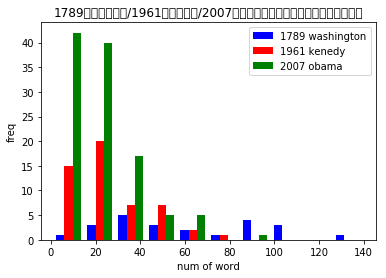

In [30]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import inaugural
from collections import Counter
sents_Washington = nltk.tokenize.sent_tokenize(inaugural.raw('1789-Washington.txt'))
sents_Kennedy= nltk.tokenize.sent_tokenize(inaugural.raw('1961-Kennedy.txt'))
sents_Obama = nltk.tokenize.sent_tokenize(inaugural.raw('2009-Obama.txt'))

cnt_Washington = Counter(len(sent.split()) for sent in sents_Washington)
cnt_Kennedy = Counter(len(sent.split()) for sent in sents_Kennedy)
cnt_Obama = Counter(len(sent.split()) for sent in sents_Obama)
print(sorted(cnt_Washington.items(), key=lambda x: [x[1], x[0]], reverse=True))
print(sorted(cnt_Kennedy.items(), key=lambda x: [x[1], x[0]], reverse=True))
print(sorted(cnt_Obama.items(), key=lambda x: [x[1], x[0]], reverse=True))

nstring_Washington = np.array( [len(sent.split()) for sent in sents_Washington] )
nstring_Kennedy = np.array( [len(sent.split()) for sent in sents_Kennedy] )
nstring_Obama = np.array( [len(sent.split()) for sent in sents_Obama] )

plt.hist([nstring_Washington, nstring_Kennedy, nstring_Obama],
          color=['blue', 'red', 'green'],
          label=['1789 washington', '1961 kenedy', '2007 obama'])
plt.title('1789年ワシントン/1961年ケネディ/2007年オバマ就任演説の文ごとの単語数分布')

plt.xlabel('num of word')
plt.ylabel('freq')
plt.legend()
plt.show()
